# Stock Market Prediction and Analysis of AAPL

# Act I. Data & Traditional ML Models

## Part 1: Preprocessing

### Objectives:
* Compile data
* Handle missing data and outliers
*  What is feature engineering step???
* Data normalization and scaling

In [ ]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
# (Act 1)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
# LSTM (ACT 2)
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.utils import plot_model
from sklearn.model_selection import TimeSeriesSplit
# Hypertuning Parameters






In [137]:
# Raw data 
# Download latest version
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")

print("Path to dataset files:", path)



Path to dataset files: C:\Users\epice\.cache\kagglehub\datasets\jacksoncrow\stock-market-dataset\versions\2


In [138]:
dataset = pd.read_csv('C:/Users/epice/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2/stocks/AAPL.csv') # How to pick csvs...
df = pd.DataFrame(dataset)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [139]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X)

[['1980-12-12' 0.5133928656578064 0.515625 0.5133928656578064
  0.5133928656578064 0.4067815542221069]
 ['1980-12-15' 0.4888392984867096 0.4888392984867096 0.4866071343421936
  0.4866071343421936 0.385558158159256]
 ['1980-12-16' 0.453125 0.453125 0.4508928656578064 0.4508928656578064
  0.3572602868080139]
 ...
 ['2020-03-30' 250.7400054931641 255.5200042724609 249.3999938964844
  254.80999755859372 254.80999755859372]
 ['2020-03-31' 255.6000061035156 262.489990234375 252.0 254.2899932861328
  254.2899932861328]
 ['2020-04-01' 246.5 248.72000122070312 239.1300048828125
  240.91000366210935 240.91000366210935]]


In [140]:
print(y)

[117258400  43971200  26432000 ...  41994100  49250500  43956200]


In [141]:

# Assuming df['date'] is your date column
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.dayofweek # Extract day of week (0=Monday, 6=Sunday)
df['month'] = df['Date'].dt.month          # Extract month (1-12)
df['quarter'] = df['Date'].dt.quarter       # Extract quarter (1-4)

# Ordinal encode 'month' and 'quarter' as ordered features
ordinal_encoder = OrdinalEncoder()
df[['month', 'quarter']] = ordinal_encoder.fit_transform(df[['month', 'quarter']])


In [142]:
df.drop(columns=['Date'], inplace=True)
X = df.drop(columns=['Adj Close'])  # Assuming 'adj_close' is your target
y = df['Adj Close']


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)

           Open       High        Low      Close     Volume  day_of_week  \
8937  95.870003  97.190002  95.669998  96.430000   38018600            0   
7189  19.830000  19.871429  19.434286  19.567142  140771400            4   
6900  23.172857  24.071428  23.108572  24.022858  259788200            0   
5245   1.057143   1.160714   1.048571   1.123571  142629200            4   
6134   5.888571   6.034286   5.870000   5.984286  139059900            1   
...         ...        ...        ...        ...        ...          ...   
2895   2.142857   2.151786   2.107143   2.125000   31810800            3   
7813  54.648571  55.571430  54.392857  55.418571   96795300            3   
905    0.475446   0.484375   0.464286   0.470982   33986400            4   
5192   1.688571   1.730714   1.652857   1.707143   57512000            0   
235    0.337054   0.339286   0.337054   0.337054    7285600            2   

      month  quarter  
8937    4.0      1.0  
7189    5.0      1.0  
6900    3.0      1

## Part 2: Implementing Traditional ML Models

Setting expectations with a prediction goal...
Indicator of price movement, trend classification, volatility pricing. 

In [144]:
print("Dataframe Shape:" , df.shape)

df.isnull().sum()
# no missing values

# The date can be a categorical variable depending on the context.
# Seasonal Trends, Day of the Week Effects, Holiday and Event patterns


Dataframe Shape: (9909, 9)


Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
day_of_week    0
month          0
quarter        0
dtype: int64

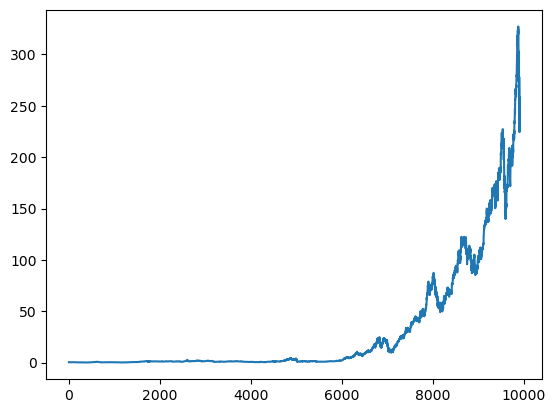

In [145]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

# Target
output_var = pd.DataFrame(df['Adj Close'])
# Features
features = ['Open', 'High', 'Low', 'Volume']

In [146]:
# Feature scaling


scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head() 

,Open,High,Low,Volume
0,0.000970,0.000967,0.000981,0.063023
1,0.000894,0.000886,0.000898,0.023516
2,0.000784,0.000777,0.000787,0.014061
3,0.000812,0.000811,0.000822,0.011462
4,0.000853,0.000852,0.000863,0.009711


### Decision Tree 

In [147]:
# Decision Tree Regressor since it is a forecast
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred  = dt_model.predict(X_test)

In [148]:
mae = mean_absolute_error(y_test, dt_pred )
mse = mean_squared_error(y_test, dt_pred )
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, dt_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


MAE: 1.0267174413645954
MSE: 3.901812405243883
RMSE: 1.9753005860485848
R^2 Score: 0.9987947253163046


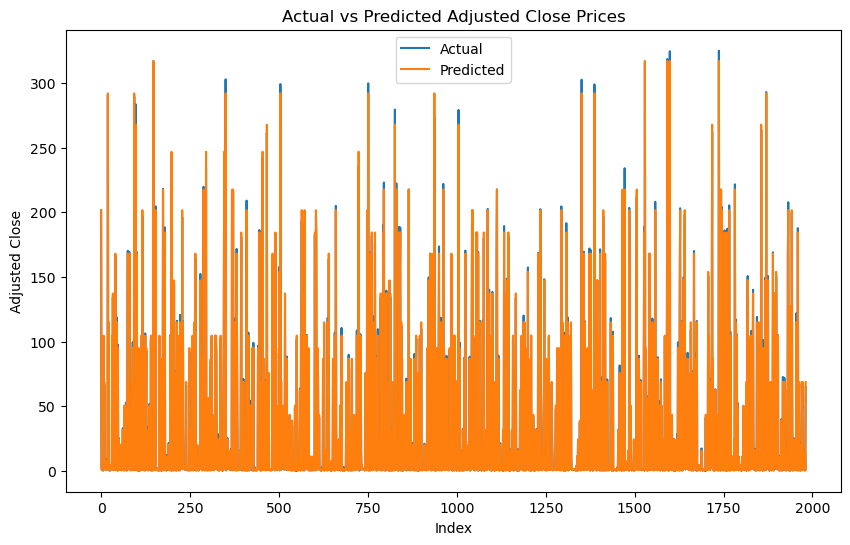

In [149]:

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(dt_pred , label='Predicted')
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.xlabel('Index')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()


### Random Forest

In [150]:
# Random Forest
rf_model  = RandomForestRegressor(max_depth=5, random_state=42)
rf_model .fit(X_train, y_train)
rf_pred = rf_model .predict(X_test)

In [151]:
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, rf_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


MAE: 0.7467634369023813
MSE: 1.9433697196816646
RMSE: 1.3940479617580108
R^2 Score: 0.9993996906870652


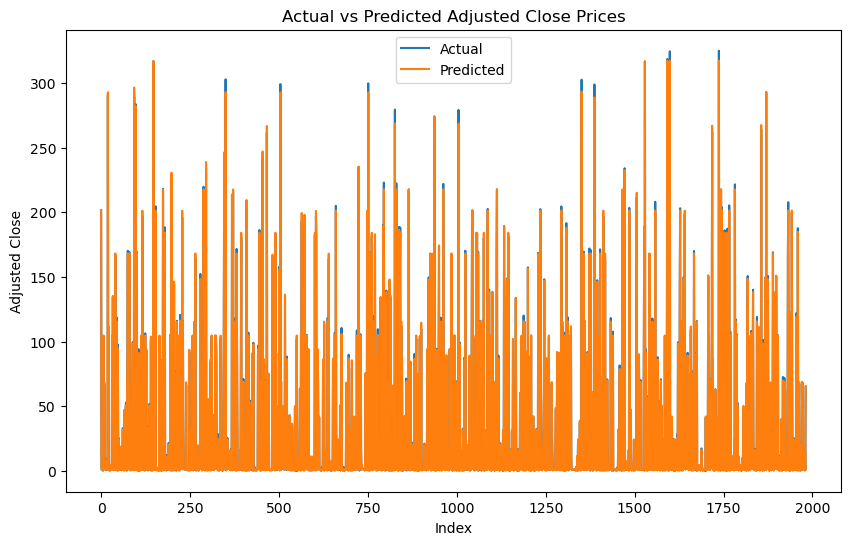

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_pred , label='Predicted')
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.xlabel('Index')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()

### Support Vector Machines (SVM)

In [153]:
# SVM
svm_model = SVR(kernel='sigmoid') # mess with kernel options ( 'linear', 'poly', 'rbf', or 'sigmoid')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [154]:
mae = mean_absolute_error(y_test, svm_pred)
mse = mean_squared_error(y_test, svm_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, svm_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


MAE: 157.07452705546092
MSE: 58242.36904570571
RMSE: 241.33455833283742
R^2 Score: -16.991139921254728


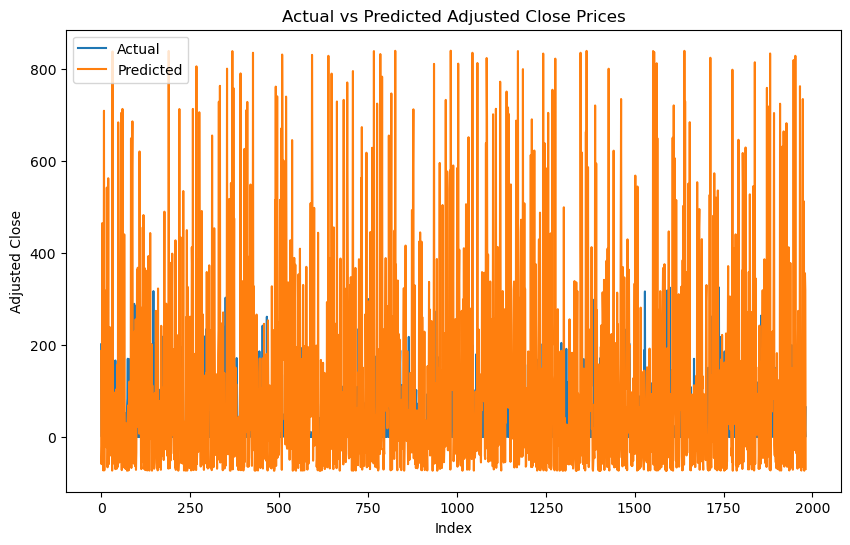

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(svm_pred , label='Predicted')
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.xlabel('Index')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()

## Part 3a: Visualization of Feature Importance

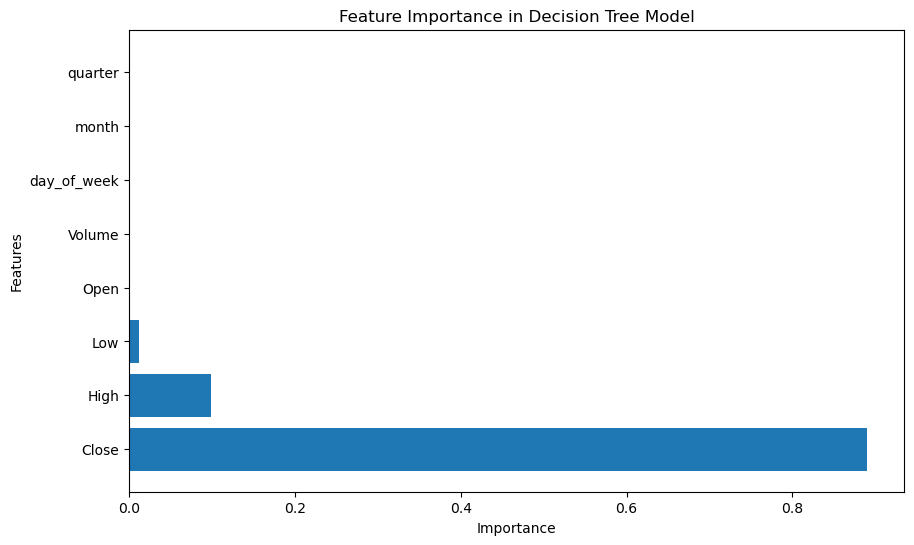

In [156]:
dt_feature_importances = dt_model.feature_importances_
features = X.columns
dt_importance_df = pd.DataFrame({'Feature': features, 'Importance': dt_feature_importances})
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(dt_importance_df['Feature'], dt_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Model')
plt.show()


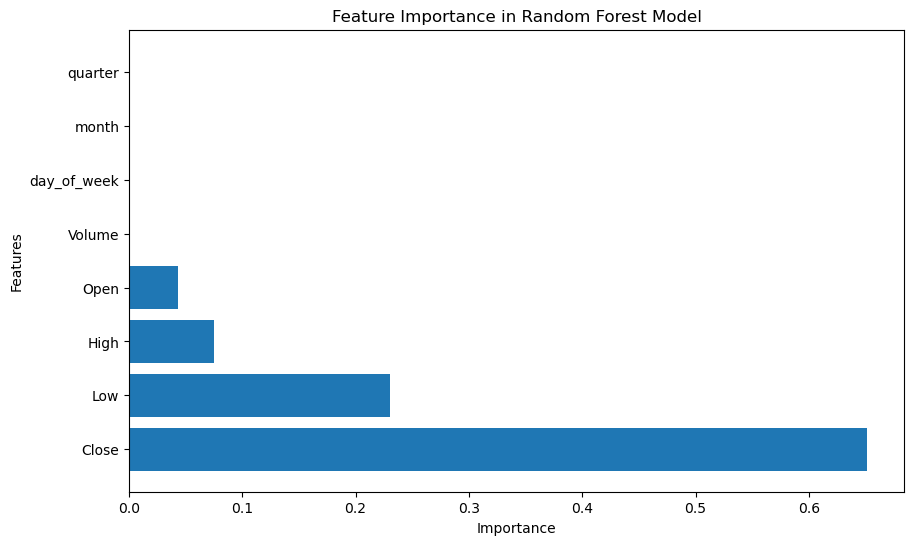

In [157]:
rf_feature_importances = rf_model.feature_importances_
features = X.columns
rf_feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importances})
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importances['Feature'], rf_feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()


Why is SVM different when finding the feature importance?

What is the problem with svm?
At this step I realized that something was going "wrong." It isn't this simple and there are other technical indicators to explore. If we notice in the other two models, there is an important feature that is not used at all. This is historical data but its missing time. This is a BIG deal because in the market, timing is everything. So even though in this iteration, SVM performs the worst its the best model because it tells us there is more work to be done.

I explore more about this approach though during the long-series-time forecast.


In [158]:

result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
svm_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(svm_feature_importances['Feature'], svm_feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance in SVM Model')
plt.show()


KeyboardInterrupt: 

## Part 3b: Feature Engineering for more robust technical indicators
What are they?
- Moving Averages (MA): identify the direction of a trend over a specific period. (filters out short-term fluctuations)
    - Simple Moving Averages: Arithmetic Mean of prices over a specific number of periods
    - Exponential Moving Average (EMA): Gives more weight to recent prices, making it more responsive to new information.
- Relative Strength Index (RSI):
    - 0 to 100: Overbought(70) or oversold (30)
    
- Moving Average Convergence Divergence (MACD): momentum indicator that shows the relationship between two moving averages of a security’s price
    - Crossovers forecast signals to buy or sell an asset

In [ ]:
# SMA 5 day 7 day 30 day 60 day 90 day

In [ ]:
# EMA  5 day 7 day 30 day 60 day 90 day


In [ ]:
# RSI


In [ ]:
# MACD

# Act II. Deep Learning & Advanced Analytics


### Part 1: LSTM (Long Short-Term Memory) network

In [ ]:
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/

#Building the LSTM Model
print(keras.__version__)
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

3.6.0
You must install pydot (`pip install pydot`) for `plot_model` to work.


c:\Users\epice\anaconda3\envs\stockdatamining\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 584us/step - loss: 7.9629
Epoch 2/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - loss: 402.8869
Epoch 3/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - loss: 150.0589
Epoch 4/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - loss: 46.6344
Epoch 5/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - loss: 9.4971
Epoch 6/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - loss: 2.1511
Epoch 7/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - loss: 0.7288
Epoch 8/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - loss: 0.3396
Epoch 9/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - loss: 0.2136
Epoch 10/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - loss: 0.1688
Epoch 11/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - loss: 0.1601
Epoch 12/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - loss: 0.1663
Epoch 13/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - loss: 0.1778
Epoch 14/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/st

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


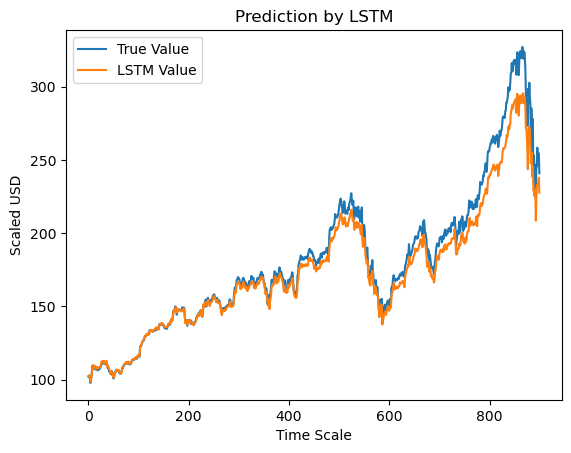

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

Up until this point, we have used a deep learning model and machine learning lets investigate a statistical model.

### Time series forecasting models

I have to choose this based on the feature engineering in part 1...

### Sentiment analysis integration


### Hyperparameter Tuning

In [ ]:
# Hypertuning the Decision Tree Regressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\epice\anaconda3\envs\stockdatamining\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\epice\anaconda3\envs\stockdatamining\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\epice\anaconda3\envs\stockdatamining\Lib\site-packages\sklearn\tree\_classes.py", line 1377, in fit
    super()._fit(
  File "c:\Users\epice\anaconda3\envs\stockdatamining\Lib\site-packages\sklearn\tree\_classes.py", line 252, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\epice\anaconda3\envs\stockdatamining\Lib\site-packages\sklearn\base.py", line 645, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\epice\anaconda3\envs\stockdatamining\Lib\site-packages\sklearn\utils\validation.py", line 1058, in check_array
    raise ValueError(
ValueError: Found array with dim 3. DecisionTreeRegressor expected <= 2.


# Act III. Integration & Evaluation

- Develop a model evaluation framework
- Define performance metrics 
(RMSE, MAE, directional accuracy)
- Implement cross-validation strategy
- Create ensemble methods combining all models
- Build pipeline for real-time predictions


## Regression Models

Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score.


## Time Series Models

Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score.


## K-Fold Crossvalidation

## Overfitting and Underfitting?

## Bootstrap Sampling

# References
https://www.investopedia.com/terms/m/macd.asp <br>
https://www.investopedia.com/terms/r/rsi.asp <br>
https://www.investopedia.com/terms/m/movingaverage.asp <br>

# FIN.